In [1]:
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
def from_jsonl_to_df(path):
    t_start = time.time()
    with open(path, 'r') as json_file:
        json_list = list(json_file)
    json_list = [json.loads(json_str) for json_str in json_list]
    df = pd.DataFrame.from_dict(json_list, orient='columns')
    
    print("DataFrame of {}".format(len(df))+" rows loaded in {:.2f} sec".format(time.time()-t_start))
    return df

def from_csv_to_df(path):
    t_start=time.time()
    if "followers" in path:
        df=pd.read_csv(path, names=["follower", "person followed", "timestamp"], header=None)
    else:
        df=pd.read_csv(path)
    print("DataFrame of {}".format(len(df))+" rows loaded in {:.2f} sec".format(time.time()-t_start))
    return df

In [3]:
df_keaks = from_jsonl_to_df("data/full/keaks.jsonl")

DataFrame of 274472 rows loaded in 5.16 sec


In [4]:
df_beats =from_jsonl_to_df("data/full/beats.jsonl")

DataFrame of 59761 rows loaded in 1.30 sec


In [5]:
df_users =from_jsonl_to_df("data/full/users.jsonl")

DataFrame of 1162572 rows loaded in 31.69 sec


In [6]:
df_followers = from_csv_to_df("data/full/followers.csv")

DataFrame of 10506442 rows loaded in 11.16 sec


In [7]:
df_audiences = from_csv_to_df("data/full/audiences.csv")

DataFrame of 28952275 rows loaded in 32.40 sec


In [8]:
df_keaks.head(2)

,keakId,createdAt,likeCount,commentCount,viewCount,averageViewProgress,duration,hashtags,contentType,hasSmallThumbnail,link,beatId,beatGenres
0,17301813623064450175,2019-10-10T21:20:59.2970322Z,4,2,42,7.80,107.0,"[91, 1, Rap, Pen, freestyle2019, Trap2K19]",freestyle,True,https://www.keakr.com/fr/keak/mon-mec-rap-1,17301813622843862243,"[{'id': '9920897543', 'name': 'Trap'}]"
1,6202649352,2018-04-02T15:06:34.9851924Z,2,2,53,0.00,68.0,[],freestyle,True,https://www.keakr.com/fr/keak/petit-salaire,None,None


In [9]:
df_audiences.head(2)

,userId,contentId,timestamp,progress,liked,commented,shared
0,users/6512051967,keaks/17301813623657913783,2020-01-01T00:00:00.4081666,0,True,True,True
1,users/17301813623701852659,keaks/17301813623464753700,2020-01-01T00:00:00.8245932,0,False,False,False


In [10]:
df_followers.head(2)

,follower,person followed,timestamp
0,users/17301813624860662494,users/17301813625195354624,2020-06-13T16:53:19.7077441Z
1,users/11928492392,users/12680019689,2019-04-11T22:23:51.9010202Z


In [11]:
df_beats.head(2)

,beatId,genres,moods,nbKeaks,nbLikes,beatmakerId,duration,bpm,createdAt,updatedAt,link,licenceType
0,17301813628927249101,"[{'id': '9920897543', 'name': 'Trap'}]","[{'id': '17301813622132424287', 'name': 'Dark'...",7,4,17301813625134492069,121.0,102.0,2021-09-20T18:16:47.1420645Z,2021-09-20T18:17:00.2684235Z,https://keakr.com/fr/beat/turquoiz,[free]
1,17301813627622625982,"[{'id': '9920897543', 'name': 'Trap'}]",[],1,5,17301813627622569830,163.0,125.0,2021-03-31T15:20:10.726762Z,2021-03-31T15:20:26.5760601Z,https://keakr.com/fr/beat/moula-i,[free]


In [12]:
df_users.head(2)

,userId,createdAt,lastConnection,usedGenres,listenedGenres,battleCreatedCount,battleLostCount,battleRespondedCount,battleWonCount,friendCount,...,mutualFollowCount,overallBeatUsage,PlaylistCount,prizeMoneyParticipationCount,prizeMoneyWinner,sessionCount,shareCount,viewCount,isBeatmaker,isSinger
0,12354401148,2019-03-02T10:23:33.0903001Z,2019-03-02T10:23:44.3283191Z,[],[],0,0,0,0,0,...,0.0,0.0,NaN,0,False,2.0,NaN,0,False,False
1,12354411487,2019-03-02T10:26:23.9016307Z,2020-09-24T06:16:46.8631984Z,[],[],0,0,0,0,0,...,NaN,0.0,NaN,0,False,8.0,NaN,0,False,False


In [13]:
df_users.describe()

,battleCreatedCount,battleLostCount,battleRespondedCount,battleWonCount,friendCount,keakCount,keakrCoinGiven,likeCount,likeGivenCount,mutualFollowCount,overallBeatUsage,PlaylistCount,prizeMoneyParticipationCount,sessionCount,shareCount,viewCount
count,1.162572e+06,1.162572e+06,1.162572e+06,1.162572e+06,1.162572e+06,1.162572e+06,1061.000000,1.162572e+06,1.159084e+06,601842.000000,837691.000000,346591.000000,1.162572e+06,1.158520e+06,29249.000000,1.162572e+06
mean,8.032191e-03,7.214177e-03,1.825263e-03,7.213317e-03,1.538281e+00,2.340199e-01,34.825636,3.333119e+00,3.648782e+00,3.916835,0.179752,0.438465,3.358072e-03,1.819358e+01,16.187801,5.347077e+01
std,2.250570e-01,2.941909e-01,1.066128e-01,2.042275e-01,4.399846e+01,4.046404e+00,194.273423,1.595598e+02,1.011568e+02,136.180003,10.370143,2.490397,7.528291e-02,1.708561e+02,381.342364,2.782418e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.000000e+00,0.000000e+00,-1.000000,0.000000,0.000000,-1.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,3.000000e+00,0.000000,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,8.000000e+00,0.000000,0.000000e+00
max,8.600000e+01,1.250000e+02,4.800000e+01,6.400000e+01,1.728100e+04,1.487000e+03,3810.000000,7.831000e+04,4.484600e+04,38268.000000,4135.000000,626.000000,1.300000e+01,5.768500e+04,49495.000000,1.124361e+06


In [14]:
def numpy_filter(array, thresholds):
    print(f"threshold || #value")
    for threshold in thresholds :
        test = array[array > threshold]
        print(f"{threshold} || {len(test)}")

threshold || #value
10 || 236405
100 || 28739
500 || 5187
1000 || 2163


(1, 1000000.0)

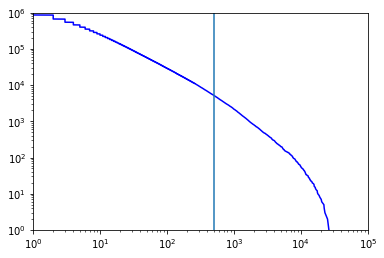

In [15]:
df_users2 = df_users[df_users['sessionCount'].notnull()]

sessioncount = np.sort(df_users2["sessionCount"])[::-1]
nb_user = np.arange(0, np.size(sessioncount))


numpy_filter(sessioncount, [10, 100, 500, 1000])


plt.figure() # tight_layout=True
plt.plot(sessioncount, nb_user, 'b-')
plt.plot([500, 500], [0.1, 1.0e6])
plt.xscale('log')
plt.yscale('log')
plt.xlim([1, 1.0e5])
plt.ylim([1, 1.0e6])

In [16]:
df_users.columns

Index(['userId', 'createdAt', 'lastConnection', 'usedGenres', 'listenedGenres',
       'battleCreatedCount', 'battleLostCount', 'battleRespondedCount',
       'battleWonCount', 'friendCount', 'keakCount', 'keakrCoinGiven',
       'keakCoinReceived', 'likeCount', 'likeGivenCount', 'mutualFollowCount',
       'overallBeatUsage', 'PlaylistCount', 'prizeMoneyParticipationCount',
       'prizeMoneyWinner', 'sessionCount', 'shareCount', 'viewCount',
       'isBeatmaker', 'isSinger'],
      dtype='object')

In [20]:
def loop_column(element):
    if isinstance(element, list):
        if len(element) > 0 :
            return element
    else:
        return None


used_genres = df_users["usedGenres"].apply(lambda x: loop_column(x))
used_genres = [element for element in used_genres if element is not None]

print(np.shape(used_genres), type(used_genres[0]), used_genres[:2])



(51636,) <class 'list'> [[{'genreId': '9920897532', 'count': 1}, {'genreId': '9920897543', 'count': 1}], [{'genreId': '9920897537', 'count': 1}]]


In [19]:
# df_users_reduced = df_users['userId', 'createdAt', 'lastConnection', 'usedGenres', 'listenedGenres', 'friendCount',
#                             'keakCount', 'likeCount', 'likeGivenCount', 'mutualFollowCount', 'sessionCount', 'shareCount', 'viewCount',
#                             'isBeatmaker', 'isSinger']

In [40]:
df_users.isBeatmaker = df_users.isBeatmaker.apply(lambda x: 1 if x==True else 0)
df_users.isSinger = df_users.isSinger.apply(lambda x: 1 if x==True else 0)

print(df_users.isBeatmaker.sum(), '+', df_users.isSinger.sum(), '=', df_users.isBeatmaker.sum()+df_users.isSinger.sum())

11913 + 68216 = 80129


In [47]:
df_users_reduced = df_users2.loc[(df_users2.sessionCount > 100)] # & (df_users2['column_name'] <= B)]
print("New shape is: ", df_users_reduced.shape)

df_users_reduced.isBeatmaker = df_users_reduced.isBeatmaker.apply(lambda x: 1 if x==True else 0)
df_users_reduced.isSinger = df_users_reduced.isSinger.apply(lambda x: 1 if x==True else 0)

# df_users_reduced.isBeatmaker.loc[(df_users_reduced.isBeatmaker == True)] = 1
# df_users_reduced.isBeatmaker.loc[(df_users_reduced.isBeatmaker == False)] = 0
# df_users_reduced.isSinger.loc[(df_users_reduced.isSinger == True)] = 1
# df_users_reduced.isSinger.loc[(df_users_reduced.isSinger == False)] = 0

print("isBeatmaker + isSinger: ", df_users_reduced.isBeatmaker.sum(), '+', df_users_reduced.isSinger.sum(), '=', df_users_reduced.isBeatmaker.sum()+df_users_reduced.isSinger.sum())


New shape is:  (28739, 25)
isBeatmaker + isSinger:  3154 + 17707 = 20861


/tmp/ipykernel_7508/342176310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_reduced.isBeatmaker = df_users_reduced.isBeatmaker.apply(lambda x: 1 if x==True else 0)
/tmp/ipykernel_7508/342176310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_reduced.isSinger = df_users_reduced.isSinger.apply(lambda x: 1 if x==True else 0)
